In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

In [2]:
movies = pd.read_csv('data/ml-latest/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('data/ml-latest/ratings.csv')
ratings.drop(['timestamp'],axis=1,inplace=True)
ratings = ratings[['userId','movieId','rating']][:500000]
ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [4]:
rating_movies = pd.merge(ratings,movies, on='movieId')
rating_movies

,userId,movieId,rating,title,genres
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
...,...,...,...,...,...
499995,5069,80454,3.0,Princess (Prinsessa) (2010),Drama
499996,5069,80584,3.0,"Patrik Age 1.5 (Patrik 1,5) (2008)",Comedy|Drama|Romance
499997,5069,83760,1.5,V2: Dead Angel (Vares 2 - Jäätynyt Enkeli) (2007),Action|Comedy|Crime
499998,5073,439,3.0,Dangerous Game (1993),Drama


In [5]:
rating_movies.groupby('userId')['movieId'].count()

userId
1        16
2        15
3        11
4       736
5        72
       ... 
5077    558
5078     44
5079     42
5080      5
5081     33
Name: movieId, Length: 5081, dtype: int64

In [6]:
rating_matrix = rating_movies.pivot_table('rating',index='userId',columns='title').fillna(0.0)
display(rating_matrix.shape)
rating_matrix.head()

(5081, 17817)

title,"""Great Performances"" Cats (1998)",#Horror (2015),$ (Dollars) (1971),$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),...,¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),İtirazım Var (2014),Он вам не Димон (2017),Оно (1990),Сердца трех (1992),Я худею (2018),チェブラーシカ (2010)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
rating_matrixTT = rating_matrix.T
display(rating_matrixTT.shape)
rating_matrixTT.head()

(17817, 5081)

userId,1,2,3,4,5,6,7,8,9,10,...,5072,5073,5074,5075,5076,5077,5078,5079,5080,5081
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Horror (2015),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$ (Dollars) (1971),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$5 a Day (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SVD를 이용한 영화간 상관관계

TruncatedSVD

In [8]:
# n_components를 통해 차원을 20개로 축소함
SVD = TruncatedSVD(n_components=20)
matrix = SVD.fit_transform(rating_matrixTT)
matrix.shape

(17817, 20)

In [9]:
matrix

array([[ 1.62622079e-01,  3.72420114e-02, -1.60834025e-01, ...,
         1.81118187e-01,  3.70856165e-01, -1.07337230e-01],
       [ 2.95391571e-02,  4.74909695e-02, -8.93793518e-03, ...,
         4.67016947e-02, -8.84811622e-03, -3.98741881e-02],
       [ 1.10147443e-01,  6.65640638e-02, -3.00120769e-01, ...,
        -9.20350158e-01,  9.58531220e-01, -2.60910460e-01],
       ...,
       [ 2.94769711e-02,  3.09320995e-02,  9.35003171e-04, ...,
         3.73243665e-02, -1.46123136e-02, -1.13344438e-04],
       [ 1.98515726e-02,  6.00144255e-02,  2.72511152e-03, ...,
        -4.05539721e-02,  8.82101087e-02,  5.31003204e-02],
       [ 1.95098573e-01,  2.25828059e-01,  4.81226679e-02, ...,
        -2.23316106e-02, -1.04180088e-01,  2.65123004e-02]])

In [10]:
# 피어슨 상관계수로 변환
corr = np.corrcoef(matrix)
corr.shape

(17817, 17817)

In [11]:
corr_df = pd.DataFrame(corr,columns = rating_matrix.columns,
                       index = rating_matrix.columns)
corr_df

title,"""Great Performances"" Cats (1998)",#Horror (2015),$ (Dollars) (1971),$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),...,¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),İtirazım Var (2014),Он вам не Димон (2017),Оно (1990),Сердца трех (1992),Я худею (2018),チェブラーシカ (2010)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",1.000000,-0.033332,0.102159,0.101998,-0.084963,0.121205,-0.307642,0.634654,0.060812,0.059290,...,0.055813,-0.208399,0.204889,0.112610,-0.082185,0.297328,0.137385,-0.313102,0.525273,-0.255194
#Horror (2015),-0.033332,1.000000,0.061720,0.061674,0.352839,0.668680,-0.026417,-0.106153,0.525026,0.095424,...,0.013409,0.001435,-0.057509,0.232617,0.363536,-0.080081,0.581258,0.593304,0.176168,0.496053
$ (Dollars) (1971),0.102159,0.061720,1.000000,0.999994,0.544797,-0.260712,0.392512,0.395894,-0.050084,-0.126557,...,-0.010652,0.678559,0.163202,0.441952,-0.270510,0.098831,0.440516,-0.158145,0.331386,-0.073392
$5 a Day (2008),0.101998,0.061674,0.999994,1.000000,0.544518,-0.259085,0.392952,0.396185,-0.048880,-0.126090,...,-0.010186,0.678908,0.163186,0.441605,-0.269358,0.099188,0.439582,-0.156485,0.330628,-0.071804
'71 (2014),-0.084963,0.352839,0.544797,0.544518,1.000000,0.061677,0.497717,0.305669,0.060189,0.066438,...,0.079165,0.596393,0.529436,0.755897,0.104787,0.025291,0.571789,0.060498,0.179687,0.079188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Он вам не Димон (2017),0.297328,-0.080081,0.098831,0.099188,0.025291,0.128764,0.001952,0.036551,0.193662,0.062923,...,-0.070964,0.037640,-0.106327,-0.113139,0.426285,1.000000,-0.149735,-0.225129,0.560447,0.039361
Оно (1990),0.137385,0.581258,0.440516,0.439582,0.571789,0.245400,-0.013834,0.111753,0.354456,-0.125205,...,0.114536,0.149777,-0.030905,0.626586,-0.193307,-0.149735,1.000000,0.219478,0.536425,0.191822
Сердца трех (1992),-0.313102,0.593304,-0.158145,-0.156485,0.060498,0.613854,-0.110882,-0.354604,0.587861,0.149389,...,0.089328,-0.146291,-0.006709,-0.031665,0.220876,-0.225129,0.219478,1.000000,-0.045605,0.931623


In [12]:
corr_df.loc['Toy Story (1995)'].sort_values(ascending=False)[:20]

title
Toy Story (1995)                                     1.000000
Willy Wonka & the Chocolate Factory (1971)           0.916734
Independence Day (a.k.a. ID4) (1996)                 0.852395
Mission: Impossible (1996)                           0.826148
Birdcage, The (1996)                                 0.822624
Toy Story 2 (1999)                                   0.813057
Star Wars: Episode IV - A New Hope (1977)            0.811767
James and the Giant Peach (1996)                     0.804053
Groundhog Day (1993)                                 0.795945
Hunchback of Notre Dame, The (1996)                  0.791538
Lion King, The (1994)                                0.788665
Star Wars: Episode VI - Return of the Jedi (1983)    0.783044
Twister (1996)                                       0.780918
Mr. Holland's Opus (1995)                            0.780693
Nightmare Before Christmas, The (1993)               0.779074
Happy Gilmore (1996)                                 0.770280
Cl

In [13]:
corr2 = corr[:200, :200]
corr2.shape

(200, 200)

<AxesSubplot:>

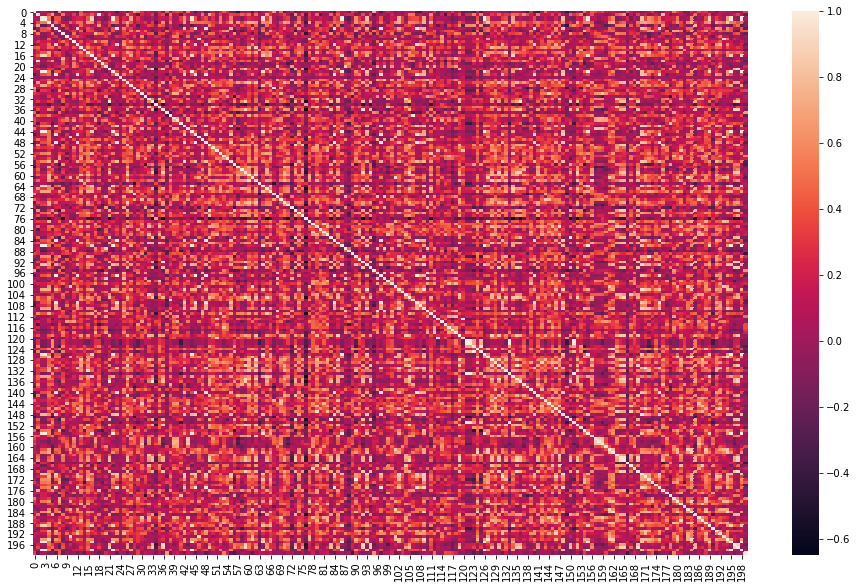

In [14]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

In [15]:
# 특정 영화와 상관계수가 높은 영화 뽑기
movie_title = rating_matrix.columns
movie_title_list = list(movie_title)

# 특정 영화 인덱스
coffey_hands = movie_title_list.index("Toy Story (1995)")

In [16]:
corr_coffey_hands  = corr[coffey_hands]
corr_coffey_hands

array([ 0.42731986,  0.22745703, -0.04922138, ..., -0.08820838,
        0.20746847, -0.0117656 ])

In [17]:
list(movie_title[corr_coffey_hands >= 0.9])

['Toy Story (1995)', 'Willy Wonka & the Chocolate Factory (1971)']

---
---
---
### SVD를 이용한 행렬분해

사용자에게 추천을 해주기 위한 사용자 맞춤 협업 필터링

In [19]:
# 위에서 나온 rating_matrix를 사용하지만 columns은 title이 아닌 movieId를 사용

rating_matrix = rating_movies.pivot_table('rating',index='userId',columns='movieId').fillna(0.0)
display(rating_matrix.shape)
rating_matrix.head()

(5081, 17821)

movieId,1,2,3,4,5,6,7,8,9,10,...,193279,193281,193421,193429,193431,193595,193599,193793,193843,193861
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,4.0,0.0,0.0,2.0,4.5,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1. pivot_table을 matrix로 변환

2. 각 user의 평균 평점 구하기

3. 1번 값과 2번 값을 빼서 사용자-평균 데이터 값을 변경

In [20]:
# 1. pivot_table을 matrix로 변환
matrix = rating_matrix.values
display(matrix)
display(matrix.shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(5081, 17821)

In [24]:
# 2. 각 user의 평균 평점 구하기
matrix_mean = np.mean(matrix, axis = 1)
display(matrix_mean)
display(matrix_mean.shape)

array([0.00297402, 0.00308625, 0.00218843, ..., 0.00897817, 0.0008417 ,
       0.00659334])

(5081,)

In [26]:
# 3. 1번 값과 2번 값을 빼서 사용자-평균 데이터 값을 변경
user_matrix_mean = matrix - matrix_mean.reshape(-1,1)
display(user_matrix_mean)
display(user_matrix_mean.shape)

array([[-2.97401942e-03, -2.97401942e-03, -2.97401942e-03, ...,
        -2.97401942e-03, -2.97401942e-03, -2.97401942e-03],
       [-3.08624656e-03, -3.08624656e-03, -3.08624656e-03, ...,
        -3.08624656e-03, -3.08624656e-03, -3.08624656e-03],
       [-2.18842938e-03, -2.18842938e-03, -2.18842938e-03, ...,
        -2.18842938e-03, -2.18842938e-03, -2.18842938e-03],
       ...,
       [ 3.99102183e+00, -8.97817182e-03, -8.97817182e-03, ...,
        -8.97817182e-03, -8.97817182e-03, -8.97817182e-03],
       [-8.41703608e-04, -8.41703608e-04, -8.41703608e-04, ...,
        -8.41703608e-04, -8.41703608e-04, -8.41703608e-04],
       [-6.59334493e-03, -6.59334493e-03, -6.59334493e-03, ...,
        -6.59334493e-03, -6.59334493e-03, -6.59334493e-03]])

(5081, 17821)

In [27]:
# 아래의 데이터프레임은 우리가 가지고 있던 user_movie pivot_table을
# matrix_user_mean로 변경한 것임
matrix_user_mean = pd.DataFrame(user_matrix_mean, columns = rating_matrix.columns)
matrix_user_mean.index = rating_matrix.index
matrix_user_mean

movieId,1,2,3,4,5,6,7,8,9,10,...,193279,193281,193421,193429,193431,193595,193599,193793,193843,193861
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,...,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974,-0.002974
2,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,...,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086,-0.003086
3,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,...,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188,-0.002188
4,3.859688,3.859688,-0.140312,-0.140312,1.859688,4.359688,-0.140312,-0.140312,-0.140312,3.859688,...,-0.140312,-0.140312,-0.140312,-0.140312,-0.140312,-0.140312,-0.140312,-0.140312,-0.140312,-0.140312
5,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,...,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227,-0.017227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,-0.093457,-0.093457,-0.093457,-0.093457,-0.093457,2.906543,-0.093457,-0.093457,-0.093457,-0.093457,...,-0.093457,-0.093457,-0.093457,-0.093457,-0.093457,-0.093457,-0.093457,-0.093457,-0.093457,-0.093457
5078,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,...,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876,-0.009876
5079,3.991022,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,...,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978,-0.008978


### Matrix Factorization

svds

spicy에 있는 svds를 사용하면 U행렬, Sigma행렬  V 전치 행렬(Vt)

In [28]:
# 상관관계처럼 차원 개수를 20개로 설정
U, sigma, Vt = svds(matrix_user_mean, k = 20)

In [29]:
display(U)
display(U.shape)

array([[-1.53198462e-03,  2.81415006e-03,  1.20545683e-03, ...,
         1.39822851e-03, -9.69468716e-04, -4.92139760e-04],
       [ 1.53148879e-04, -3.28592777e-04,  7.18616096e-04, ...,
         2.79448293e-03, -1.93700448e-03, -6.31934016e-04],
       [-8.00985835e-05,  1.10191639e-03, -3.39789188e-03, ...,
         5.68544112e-04, -1.34073403e-04, -7.45279328e-04],
       ...,
       [-6.78791296e-04, -6.88446093e-05,  5.71532460e-03, ...,
        -1.58308365e-03,  4.57049760e-03, -6.91158259e-03],
       [ 6.52997251e-04, -2.32824439e-03,  9.50524576e-04, ...,
         3.11542148e-04, -3.30539927e-04, -6.18348876e-04],
       [ 2.15514110e-03, -1.80192154e-04, -2.80293329e-03, ...,
        -5.15019517e-03, -1.35243711e-03, -7.26638357e-03]])

(5081, 20)

In [30]:
display(sigma)
display(sigma.shape)

array([ 156.58223269,  157.47345558,  158.68118072,  160.56609741,
        167.33054779,  178.66381644,  184.47046864,  189.35210276,
        197.99511752,  206.58757196,  212.50313144,  223.59504738,
        239.36653705,  269.33799926,  280.7644022 ,  309.08591296,
        337.3256453 ,  402.63662943,  498.37729919, 1039.25687333])

(20,)

In [31]:
display(Vt)
display(Vt.shape)

array([[ 4.69919274e-02,  2.78347772e-02, -2.77645811e-02, ...,
        -1.33666246e-03, -7.02473320e-04, -9.92819845e-04],
       [ 7.74575446e-02, -5.01387121e-03,  5.75225461e-04, ...,
        -8.39217616e-04, -5.42310793e-05, -1.15311495e-03],
       [-1.67889190e-02, -1.93591440e-02,  1.67557907e-03, ...,
         1.17743350e-03,  8.01668561e-04,  1.63497661e-03],
       ...,
       [-5.43309006e-02, -4.74645100e-02, -2.26230516e-02, ...,
        -1.68405063e-03, -1.71656010e-03, -1.64066136e-03],
       [-1.16942975e-02, -1.07912167e-02, -2.28925422e-02, ...,
         2.45287859e-04,  3.58258415e-04,  3.81924480e-05],
       [-8.19708997e-02, -3.26024977e-02, -1.19014823e-02, ...,
         2.63493260e-03,  2.59275131e-03,  2.63928134e-03]])

(20, 17821)

In [32]:
# 여기서 sigma가 0이 아닌 1차원으로만 표현된 행렬인 상태임
# 그렇기 때문에 0이 포함된 대칭행렬로 변환해주어야 함
sigma = np.diag(sigma)
display(sigma.shape)
print(sigma[0])
print(sigma[1])
# 이게 SVD 적용해 분해한 상태임

(20, 20)

[156.58223269   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
[  0.         157.47345558   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]


In [ ]:
np.dot(np.dot(U, sigma), Vt)

In [33]:
# 원본 행렬로 복구
# U, sigma, Vt의 내적을 수행하면 다시 원본 행렬로 복원이 됨
# 거기에 rating_matrix를 더해준다
svd_preds = pd.DataFrame(np.dot(np.dot(U, sigma), Vt) + matrix_mean.reshape(-1, 1), 
                         columns = matrix_user_mean.columns)
svd_preds

# 결론적으로 이게 예측값임

movieId,1,2,3,4,5,6,7,8,9,10,...,193279,193281,193421,193429,193431,193595,193599,193793,193843,193861
0,-0.050346,-0.047638,-0.015971,-0.001670,-0.013134,0.024601,-0.029962,-0.006347,-0.001566,-0.033021,...,-0.003525,-0.003288,0.000589,-0.000045,0.000272,-0.003288,-0.002362,-0.001497,-0.001713,-0.001246
1,-0.042325,-0.067415,-0.037505,0.020659,-0.027123,-0.046411,-0.004619,-0.007218,-0.017113,-0.073186,...,-0.004396,-0.004132,-0.005142,-0.004326,-0.004734,-0.004132,-0.003365,-0.002099,-0.001805,-0.002181
2,0.007879,-0.021697,-0.030891,-0.007449,-0.027092,0.056330,-0.044355,-0.001930,-0.000546,-0.022650,...,0.001292,0.001189,0.002755,0.002102,0.002429,0.001189,0.000929,0.000584,0.000720,-0.000021
3,2.654335,2.550812,1.731585,0.029460,0.971315,4.672153,0.834902,0.129099,0.854311,4.474141,...,-0.005030,-0.003579,-0.004671,-0.001456,-0.003063,-0.003579,-0.015037,0.003858,-0.006048,0.019241
4,-0.284620,-0.061740,-0.020050,0.022335,0.039185,0.541748,-0.148580,0.006756,0.016921,-0.168220,...,0.017822,0.016690,-0.006350,-0.002031,-0.004191,0.016690,0.017320,0.000924,-0.001680,0.006979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5076,1.326912,0.821940,0.246131,0.058208,0.179949,2.153725,0.071595,0.008469,0.155137,0.541170,...,0.012301,0.008057,0.015660,0.004999,0.010329,0.008057,0.003187,-0.018835,-0.011426,-0.025119
5077,0.182091,-0.073497,-0.087106,-0.009415,-0.062987,-0.092554,0.018898,0.002254,-0.059144,-0.117249,...,0.008268,0.007818,0.021768,0.016884,0.019326,0.007818,0.010899,0.004668,0.007469,0.005680
5078,0.979964,0.000110,-0.123298,-0.067440,-0.083899,-0.089335,-0.052829,-0.016059,-0.062294,0.092903,...,0.004529,0.004344,0.005263,0.004630,0.004947,0.004344,0.006752,0.002334,0.003971,0.002651
5079,0.113421,0.018030,-0.006231,0.007402,-0.003799,-0.060954,0.014091,0.004704,-0.002450,-0.005884,...,-0.000623,-0.000549,-0.001183,-0.000852,-0.001017,-0.000549,-0.000620,0.000055,-0.000217,0.000300


In [34]:
svd_preds.iloc[1,:].sort_values(ascending=False)

movieId
1307    0.176043
1197    0.174900
1968    0.173594
1394    0.173335
2918    0.172128
          ...   
6874   -0.114106
47     -0.120409
648    -0.140389
733    -0.155456
780    -0.172549
Name: 1, Length: 17821, dtype: float64

1. user_id, movies_data, ratings_data를 이용한 영화 추천 함수 
2. SVD로 나온 결과의 영화 폄점이 가능 높은 데이터 순으로 정렬
3. 사용자가 본 데이터 제외 >> 사용자가 안 본 영화중에서 평점이 높은 것을 추천

In [64]:
def recommend_movies(svd_preds, user_id, movies_data, ratings_df, num_recommendations=5):
    # 1. 영화 평점이 높은 순으로 정렬
    sorted_prediction = svd_preds.iloc[user_id].sort_values(ascending=False)
    
    # 2. 원본 평점 데이터에서 userid 데이터를 뽑아낸다
    user_data = ratings_df[ratings_df.userId == user_id]
    
    # 3. user_data와 원본 영화데이터를 합침
    # user가 본 영화목록
    user_history = user_data.merge(movies_data, on='movieId').sort_values('rating',ascending = False)
    
    # 4. 사용자가 본 영화 데이터 제거
    recomm = movies_data[~movies_data['movieId'].isin(user_history['movieId'])]
    
    # 5. 1번과 4번을 합쳐 데이터프레임으로 만들어줌
    # user가 안 본 영화 점수 예측
    recommendations = recomm.merge(pd.DataFrame(sorted_prediction).reset_index(), on = 'movieId')
    
    # 6. 컬럼이름 변경 후 정렬 
    recommendations = recommendations.rename(columns = {user_id : 'Prediction'}).sort_values('Prediction', ascending=False).iloc[:num_recommendations]
    
    return user_history, recommendations

In [61]:
user_history, recommendations = recommend_movies(svd_preds, 10, movies, ratings, num_recommendations=10)

In [62]:
user_history

,userId,movieId,rating,title,genres
0,10,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
55,10,1198,5.0,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
67,10,1244,5.0,Manhattan (1979),Comedy|Drama|Romance
65,10,1234,5.0,"Sting, The (1973)",Comedy|Crime
64,10,1230,5.0,Annie Hall (1977),Comedy|Romance
...,...,...,...,...,...
104,10,2712,2.0,Eyes Wide Shut (1999),Drama|Mystery|Thriller
46,10,1093,2.0,"Doors, The (1991)",Drama
70,10,1255,2.0,Bad Taste (1987),Comedy|Horror|Sci-Fi
81,10,1639,2.0,Chasing Amy (1997),Comedy|Drama|Romance


In [63]:
recommendations

,movieId,title,genres,Prediction
2613,2959,Fight Club (1999),Action|Crime|Drama|Thriller,0.658107
4444,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,0.599753
5254,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,0.560265
2253,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,0.535617
2516,2858,American Beauty (1999),Drama|Romance,0.509271
6253,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,0.499592
3813,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,0.483388
333,356,Forrest Gump (1994),Comedy|Drama|Romance|War,0.469658
3738,4226,Memento (2000),Mystery|Thriller,0.439980
2424,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery,0.430634
